Aperçu des données :
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

Dimensions du dataset : (1000, 10)

Types des variables :
int64     5
object    5
Name: count, dtype: int64


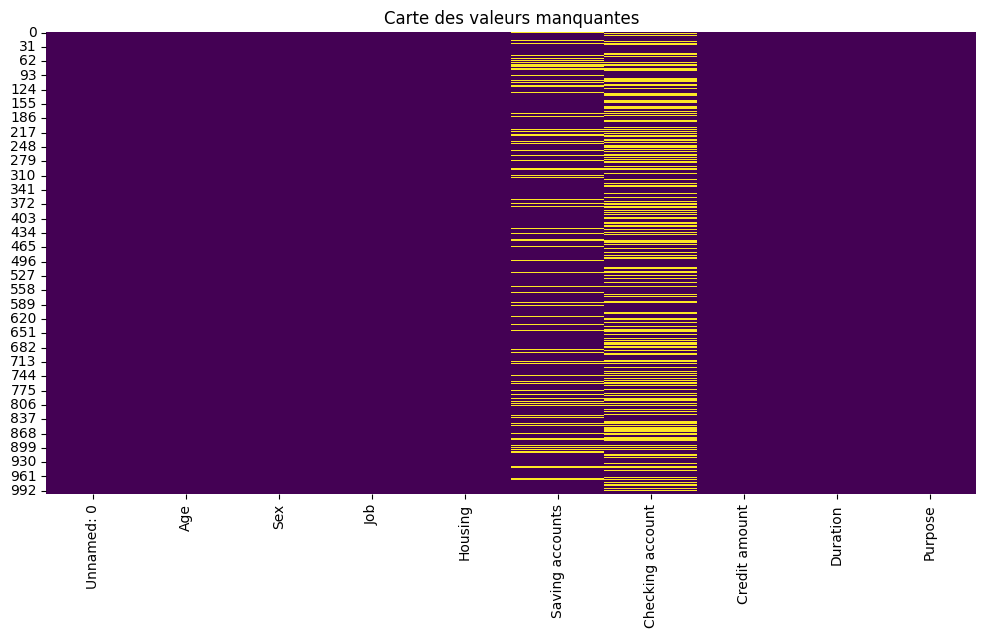


Pourcentage des valeurs manquantes :
Checking account    39.4
Saving accounts     18.3
Age                  0.0
Unnamed: 0           0.0
Job                  0.0
Sex                  0.0
Housing              0.0
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

Données après imputation :
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


C:\Users\LENOVO T14S\AppData\Local\Temp\ipykernel_13040\3423123208.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Saving accounts'].fillna('unknown', inplace=True)
C:\Users\LENOVO T14S\AppData\Local\Temp\ipykernel_13040\3423123208.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

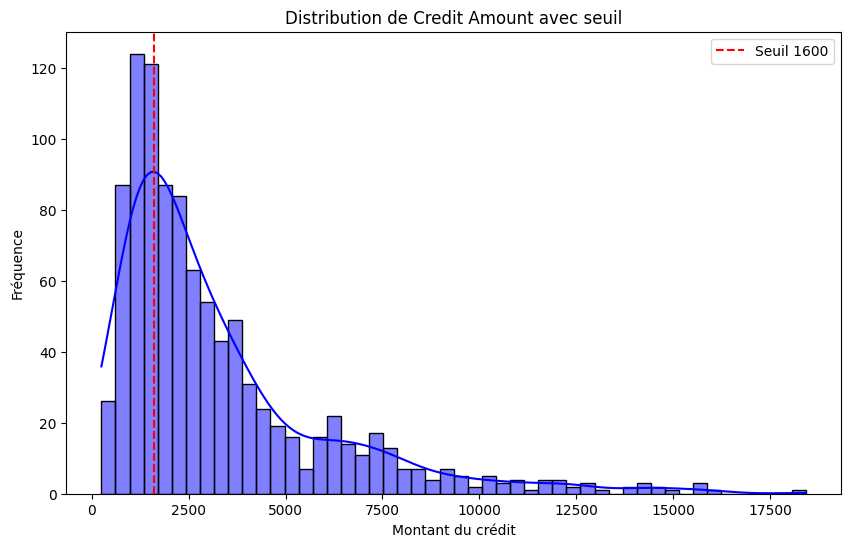


Top 10 des corrélations positives avec CreditGiven :
CreditGiven                    1.000000
Credit amount                  0.556158
Duration                       0.470173
Job                            0.229601
Purpose_furniture/equipment    0.115350
Sex_male                       0.103471
Saving accounts_unknown        0.058962
Purpose_vacation/others        0.042158
Checking account_moderate      0.037286
Unnamed: 0                     0.031007
Name: CreditGiven, dtype: float64

Top 10 des corrélations négatives avec CreditGiven :
Checking account_unknown      -0.019295
Saving accounts_quite rich    -0.034652
Age                           -0.038463
Purpose_repairs               -0.047513
Checking account_rich         -0.077826
Saving accounts_rich          -0.080948
Purpose_education             -0.083776
Housing_own                   -0.084236
Purpose_radio/TV              -0.104104
Purpose_domestic appliances   -0.111983
Name: CreditGiven, dtype: float64


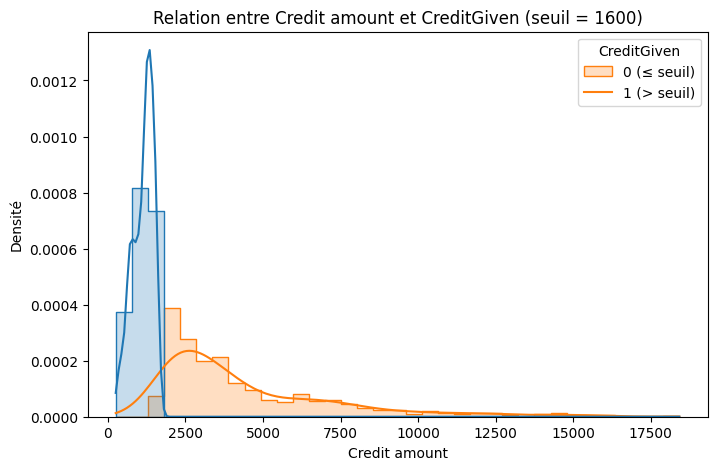

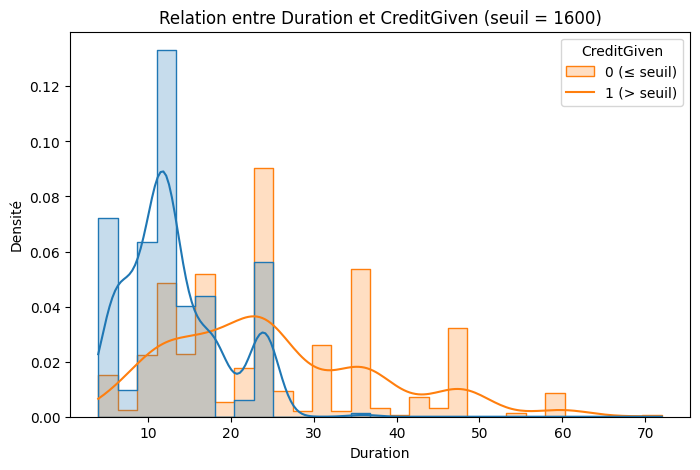

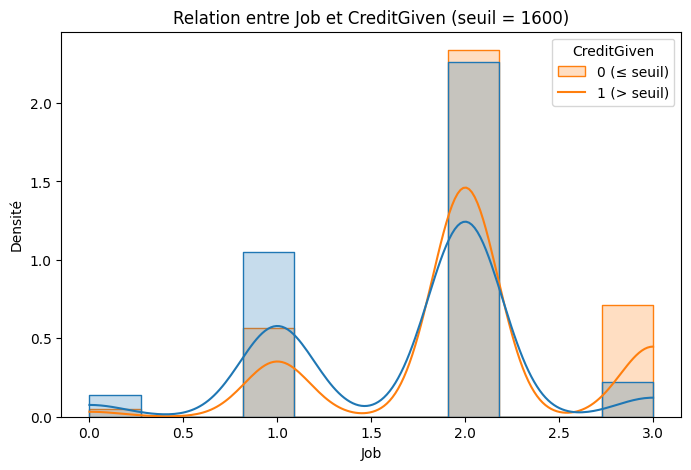

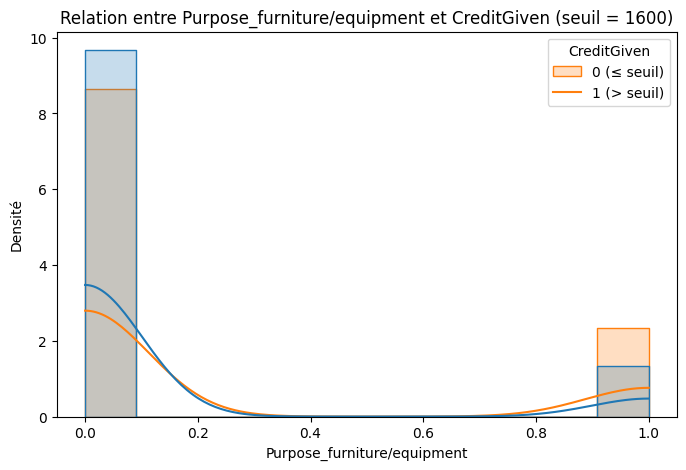

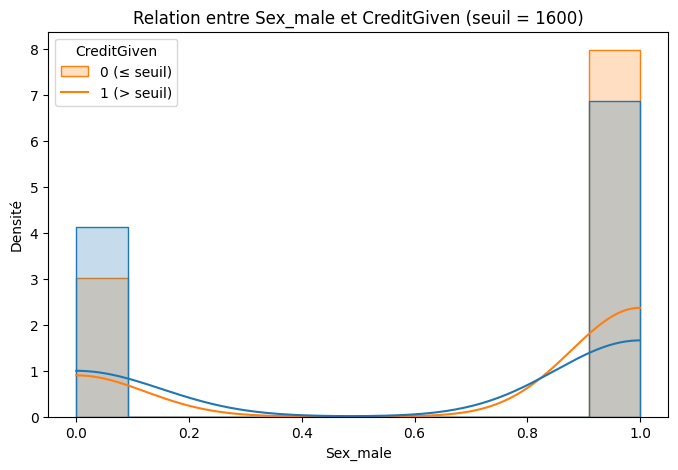

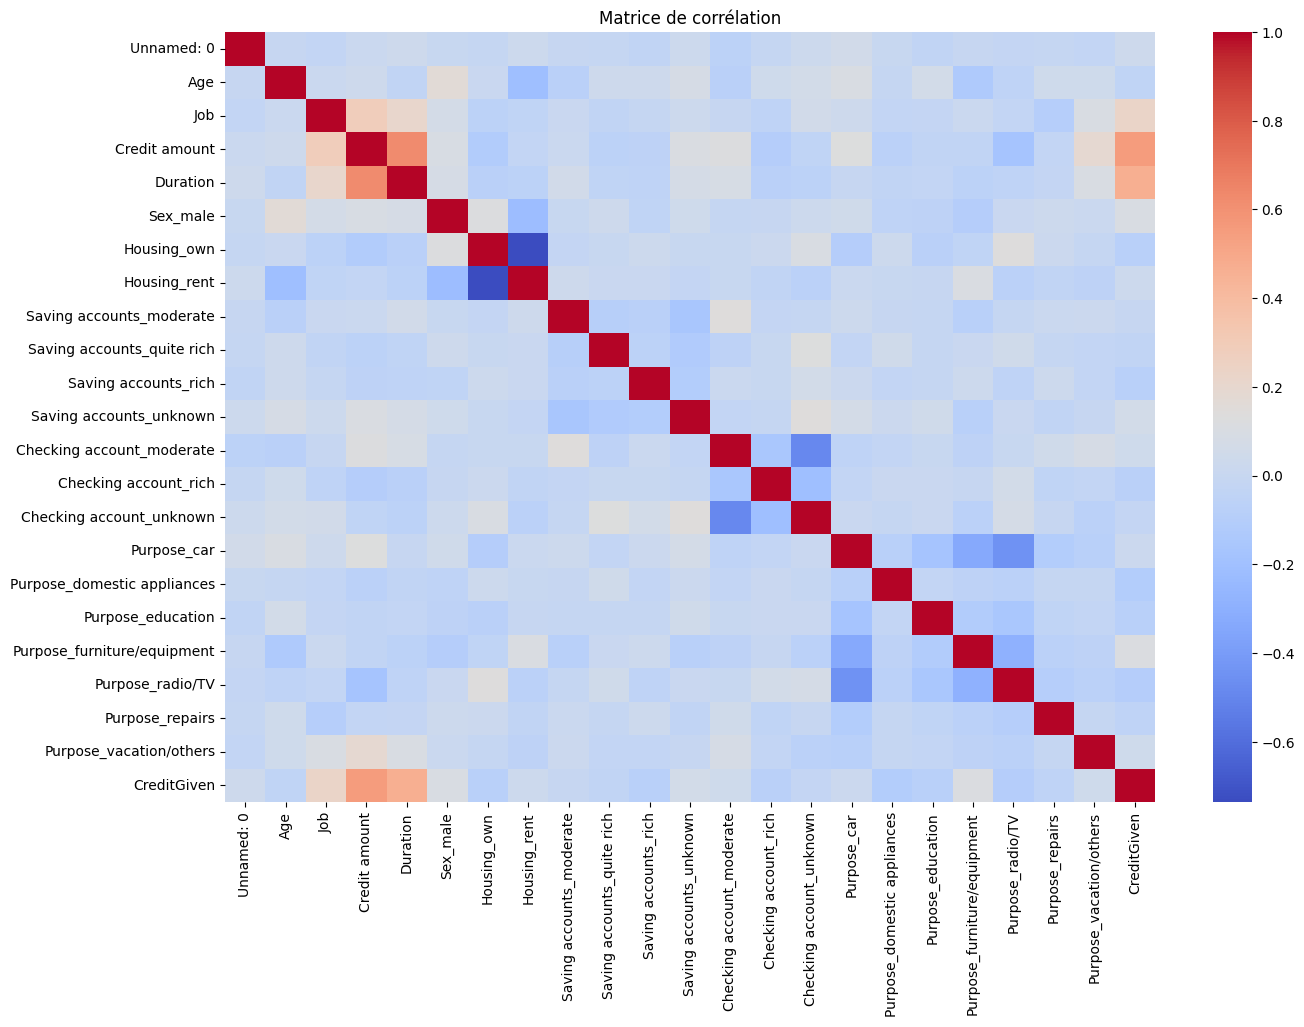

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = "german_credit_data.csv"
data = pd.read_csv(file_path)

# Étape 1 : Afficher un aperçu des données
print("Aperçu des données :")
print(data.head())

# Étape 2 : Exploration des données
print("\nDimensions du dataset :", data.shape)
print("\nTypes des variables :")
print(data.dtypes.value_counts())

# Visualiser les valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()

# Calculer les valeurs manquantes en pourcentage
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
print("\nPourcentage des valeurs manquantes :")
print(missing_percentage.sort_values(ascending=False))

# Étape 3 : Gestion des valeurs manquantes
# Imputation des colonnes catégoriques
data['Saving accounts'].fillna('unknown', inplace=True)
data['Checking account'].fillna('unknown', inplace=True)

# Vérifier après imputation
print("\nDonnées après imputation :")
print(data.isnull().sum())

# Étape 4 : Visualisation de la distribution de 'Credit amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit amount'], bins=50, kde=True, color='blue')
threshold = 1600
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Seuil {threshold}')
plt.title('Distribution de Credit Amount avec seuil')
plt.xlabel('Montant du crédit')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Étape 5 : Préparation des données
# Encodage des variables catégoriques
data_encoded = pd.get_dummies(data, drop_first=True)

# Création de la variable cible "CreditGiven" en fonction du seuil
data_encoded["CreditGiven"] = (data["Credit amount"] > threshold).astype(int)

# Étape 6 : Analyse des corrélations
correlation_matrix = data_encoded.corr()
target_corr = correlation_matrix["CreditGiven"].sort_values(ascending=False)

# Afficher les corrélations les plus fortes
top_positive_corr = target_corr.head(10)
top_negative_corr = target_corr.tail(10)

print("\nTop 10 des corrélations positives avec CreditGiven :")
print(top_positive_corr)

print("\nTop 10 des corrélations négatives avec CreditGiven :")
print(top_negative_corr)

# Étape 7 : Visualisation des variables les plus corrélées avec CreditGiven
top_corr_vars = target_corr.index[1:6]  # Les 5 premières variables corrélées après CreditGiven
for var in top_corr_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_encoded, x=var, hue="CreditGiven", element="step", stat="density", common_norm=False, kde=True)
    plt.title(f"Relation entre {var} et CreditGiven (seuil = {threshold})")
    plt.xlabel(var)
    plt.ylabel("Densité")
    plt.legend(title="CreditGiven", labels=["0 (≤ seuil)", "1 (> seuil)"])
    plt.show()

# Étape 8 : Matrice de corrélation complète
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()
